<a href="https://colab.research.google.com/github/DylanGraves/DS-Unit-2-Sprint-4-Practicing-Understanding/blob/master/DS_Unit_2_Sprint_Challenge_4_Practicing_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science Unit 2_
 
 # Sprint Challenge: Practicing & Understanding Predictive Modeling

### Chicago Food Inspections

For this Sprint Challenge, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 2010 to March 2019. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 

#### Your challenge: Predict whether inspections failed

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to load the data:

In [0]:
import pandas as pd

train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

assert train.shape == (51916, 17)
assert test.shape  == (17306, 17)

### Part 1: Preprocessing

You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding. (Pandas, category_encoders, sklearn.preprocessing, or any other library.)

_To earn a score of 3 for this part, find and explain leakage. The dataset has a feature that will give you an ROC AUC score > 0.90 if you process and use the feature. Find the leakage and explain why the feature shouldn't be used in a real-world model to predict the results of future inspections._

### Part 2: Modeling

**Fit a model** with the train set. (You may use scikit-learn, xgboost, or any other library.) **Use cross-validation** to **do hyperparameter optimization**, and **estimate your ROC AUC** validation score.

Use your model to **predict probabilities** for the test set. **Get an ROC AUC test score >= 0.60.**

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70 (without using the feature with leakage)._


### Part 3: Visualization

Make one visualization for model interpretation. (You may use any libraries.) Choose one of these types:

- Feature Importances
- Permutation Importances
- Partial Dependence Plot
- Shapley Values

_To earn a score of 3 for this part, make at least two of these visualization types._

### Part 4: Gradient Descent

Answer both of these two questions:

- What does Gradient Descent seek to minimize?
- What is the "Learning Rate" and what is its function?

One sentence is sufficient for each.

_To earn a score of 3 for this part, go above and beyond. Show depth of understanding and mastery of intuition in your answers._

In [2]:
# Taking a look at the data

train.shape, test.shape

((51916, 17), (17306, 17))

In [0]:
pd.set_option('display.max_rows', 500)

In [4]:
train.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0
2,1751394,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05T00:00:00,Canvass Re-Inspection,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'...",0
3,1763905,FRANK'S CHICAGO SHRIMP HOUSE,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632.0,2016-04-29T00:00:00,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.812181,-87.707125,"{'longitude': '-87.70712481334274', 'latitude'...",0
4,453326,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",NaN,NaN,NaN,0


In [5]:
train.describe(include='all')

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
count,5.191600e+04,51916,51293,5.191100e+04,51692,51904,51916,51863,51906,51890.000000,51916,51915,42261,51718.000000,51718.000000,51718,51916.000000
unique,NaN,17049,16350,NaN,329,3,13954,39,1,NaN,2257,51,42164,NaN,NaN,13410,NaN
top,NaN,SUBWAY,SUBWAY,NaN,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,NaN,2017-03-23T00:00:00,Canvass,45. FOOD HANDLER REQUIREMENTS MET - Comments: ...,NaN,NaN,"{'longitude': '-87.91442843927047', 'latitude'...",NaN
freq,NaN,654,802,NaN,34264,37731,741,51659,51906,NaN,50,24170,3,NaN,NaN,741,NaN
mean,1.330265e+06,NaN,NaN,1.549491e+06,NaN,NaN,NaN,NaN,NaN,60628.834669,NaN,NaN,NaN,41.879568,-87.676663,NaN,0.258610
std,6.202664e+05,NaN,NaN,9.018283e+05,NaN,NaN,NaN,NaN,NaN,22.736963,NaN,NaN,NaN,0.081126,0.059509,NaN,0.437875
min,4.425000e+04,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,60007.000000,NaN,NaN,NaN,41.644670,-87.914428,NaN,0.000000
25%,6.796205e+05,NaN,NaN,1.140745e+06,NaN,NaN,NaN,NaN,NaN,60614.000000,NaN,NaN,NaN,41.830296,-87.707857,NaN,0.000000
50%,1.424226e+06,NaN,NaN,1.958619e+06,NaN,NaN,NaN,NaN,NaN,60625.000000,NaN,NaN,NaN,41.890166,-87.666524,NaN,0.000000
75%,1.946952e+06,NaN,NaN,2.215507e+06,NaN,NaN,NaN,NaN,NaN,60643.000000,NaN,NaN,NaN,41.939167,-87.634461,NaN,1.000000


In [6]:
train.describe()

,Inspection ID,License #,Zip,Latitude,Longitude,Fail
count,5.191600e+04,5.191100e+04,51890.000000,51718.000000,51718.000000,51916.000000
mean,1.330265e+06,1.549491e+06,60628.834669,41.879568,-87.676663,0.258610
std,6.202664e+05,9.018283e+05,22.736963,0.081126,0.059509,0.437875
min,4.425000e+04,0.000000e+00,60007.000000,41.644670,-87.914428,0.000000
25%,6.796205e+05,1.140745e+06,60614.000000,41.830296,-87.707857,0.000000
50%,1.424226e+06,1.958619e+06,60625.000000,41.890166,-87.666524,0.000000
75%,1.946952e+06,2.215507e+06,60643.000000,41.939167,-87.634461,1.000000
max,2.279709e+06,8.700606e+06,60827.000000,42.021064,-87.525094,1.000000


In [7]:
train['State'].value_counts()

IL    51906
Name: State, dtype: int64

In [8]:
train['City'].value_counts()

CHICAGO              51659
Chicago                 91
chicago                 34
CCHICAGO                16
SCHAUMBURG               6
CHicago                  5
ELK GROVE VILLAGE        4
MAYWOOD                  4
CICERO                   3
CHESTNUT STREET          3
NAPERVILLE               2
CHICAGOCHICAGO           2
ALSIP                    2
ROSEMONT                 2
OAK PARK                 2
EAST HAZEL CREST         2
ELMHURST                 2
NILES NILES              2
SKOKIE                   2
SUMMIT                   1
EVANSTON                 1
SCHILLER PARK            1
CHICAGOI                 1
CHICAGO HEIGHTS          1
OLYMPIA FIELDS           1
WORTH                    1
HIGHLAND PARK            1
LAKE BLUFF               1
CHCHICAGO                1
BRIDGEVIEW               1
OOLYMPIA FIELDS          1
BERWYN                   1
CHICAGOHICAGO            1
BROADVIEW                1
BEDFORD PARK             1
STREAMWOOD               1
TINLEY PARK              1
C

In [9]:
train['Facility Type'].value_counts()

Restaurant                                         34264
Grocery Store                                       6904
School                                              3876
Bakery                                               846
Daycare (2 - 6 Years)                                830
Children's Services Facility                         802
Daycare Above and Under 2 Years                      656
Long Term Care                                       394
Catering                                             304
Mobile Food Dispenser                                280
Liquor                                               261
Daycare Combo 1586                                   227
Wholesale                                            203
Golden Diner                                         162
Mobile Food Preparer                                 159
Hospital                                             141
TAVERN                                                88
Shared Kitchen User (Long Term)

In [10]:
train['Inspection Type'].value_counts()

Canvass                                   24170
License                                    7825
Canvass Re-Inspection                      6346
Complaint                                  4948
License Re-Inspection                      3002
Complaint Re-Inspection                    2241
Short Form Complaint                       2103
License-Task Force                          214
Suspected Food Poisoning                    207
Consultation                                189
Tag Removal                                 146
Out of Business                             109
Task Force Liquor 1475                       92
Recent Inspection                            66
Suspected Food Poisoning Re-inspection       58
Complaint-Fire                               51
Short Form Fire-Complaint                    36
No Entry                                     21
Special Events (Festivals)                   21
Package Liquor 1474                          16
Complaint-Fire Re-inspection            

In [11]:
train.isna().sum()

Inspection ID         0
DBA Name              0
AKA Name            623
License #             5
Facility Type       224
Risk                 12
Address               0
City                 53
State                10
Zip                  26
Inspection Date       0
Inspection Type       1
Violations         9655
Latitude            198
Longitude           198
Location            198
Fail                  0
dtype: int64

In [12]:
test.isna().sum()

Inspection ID         0
DBA Name              0
AKA Name            222
License #             2
Facility Type        87
Risk                  7
Address               0
City                 18
State                 2
Zip                   8
Inspection Date       0
Inspection Type       0
Violations         3280
Latitude             61
Longitude            61
Location             61
Fail                  0
dtype: int64

In [13]:
train = train.dropna()
test = test.dropna()

train.isna().sum()

Inspection ID      0
DBA Name           0
AKA Name           0
License #          0
Facility Type      0
Risk               0
Address            0
City               0
State              0
Zip                0
Inspection Date    0
Inspection Type    0
Violations         0
Latitude           0
Longitude          0
Location           0
Fail               0
dtype: int64

In [14]:
# The "Violations" column would, I believe, be an example of leakage, since you 
# cannot know what violations an establishment would have before they are 
# inspected.

train = train.drop('Violations', axis=1)
test = test.drop('Violations', axis=1)

print(train.shape, test.shape)
train.head()

(41665, 16) (13822, 16)


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Latitude,Longitude,Location,Fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0
2,1751394,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05T00:00:00,Canvass Re-Inspection,41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'...",0
3,1763905,FRANK'S CHICAGO SHRIMP HOUSE,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632.0,2016-04-29T00:00:00,Canvass,41.812181,-87.707125,"{'longitude': '-87.70712481334274', 'latitude'...",0
5,1725221,LAKEVIEW REHABILITATION AND NURSING CENTER,LAKEVIEW REHABILITATION AND NURSING CENTER,2245580.0,Long Term Care,Risk 1 (High),735 W DIVERSEY PKWY,CHICAGO,IL,60614.0,2016-02-22T00:00:00,Canvass,41.932632,-87.647973,"{'longitude': '-87.64797278441709', 'latitude'...",0


In [15]:
train.dtypes

Inspection ID        int64
DBA Name            object
AKA Name            object
License #          float64
Facility Type       object
Risk                object
Address             object
City                object
State               object
Zip                float64
Inspection Date     object
Inspection Type     object
Latitude           float64
Longitude          float64
Location            object
Fail                 int64
dtype: object

In [17]:
X_train = train.drop(columns='Fail')
y_train = train.Fail

X_test  = test.drop(columns='Fail')
y_test  = test.Fail

X_train.shape, y_train.shape

((41665, 15), (41665,))

In [19]:
!pip install category_encoders

     |████████████████████████████████| 92kB 3.0MB/s 


In [0]:
import category_encoders as ce

encoder = ce.OrdinalEncoder()

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded  = encoder.transform(X_test)

In [16]:
import sklearn.metrics

sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [21]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_distributions = {
    'n_estimators': randint(50, 500), 
    'max_depth': randint(1, 5)
}

search = RandomizedSearchCV(
    estimator=RandomForestClassifier(n_jobs=-1, random_state=30), 
    param_distributions=param_distributions, 
    n_iter=50, 
    scoring='roc_auc', 
    n_jobs=-1, 
    cv=3, 
    verbose=10, 
    return_train_score=True, 
    random_state=30
)

search.fit(X_train_encoded, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  9

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=30, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f944f6832e8>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f944f6833c8>},
          pre_dispatch='2*n_jobs', random_state=30, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=10)

In [22]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
24,4.521580,0.031269,0.330679,0.004277,4,145,"{'max_depth': 4, 'n_estimators': 145}",0.662173,0.673119,0.669045,0.668112,0.004517,1,0.683661,0.679320,0.678510,0.680497,0.002262
49,4.071257,0.046271,0.182356,0.051436,4,129,"{'max_depth': 4, 'n_estimators': 129}",0.660099,0.672559,0.667570,0.666742,0.005121,2,0.681979,0.678669,0.677082,0.679243,0.002040
20,6.440536,0.059066,0.368707,0.047022,4,206,"{'max_depth': 4, 'n_estimators': 206}",0.660640,0.670902,0.667795,0.666445,0.004297,3,0.681582,0.677796,0.677551,0.678976,0.001845
10,2.423722,0.013957,0.193863,0.056011,4,68,"{'max_depth': 4, 'n_estimators': 68}",0.658224,0.671820,0.668218,0.666087,0.005752,4,0.679017,0.676889,0.675672,0.677192,0.001382
46,9.765094,0.149673,0.532611,0.003342,4,310,"{'max_depth': 4, 'n_estimators': 310}",0.660418,0.669645,0.667316,0.665793,0.003918,5,0.681373,0.676381,0.676915,0.678223,0.002238


In [23]:
search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=-1,
            oob_score=False, random_state=30, verbose=0, warm_start=False)

In [24]:
search.best_score_

0.668111989963742

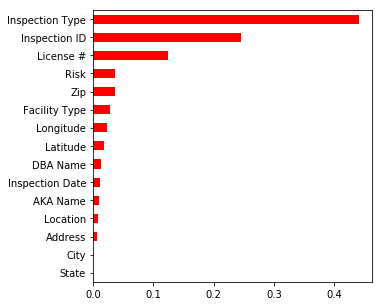

In [28]:
# Feature Importances

import matplotlib.pyplot as plt

n = len(X_train_encoded.columns)
figsize = (5,5)

best = search.best_estimator_

importances = pd.Series(best.feature_importances_, X_train_encoded.columns)
top_n = importances.sort_values()[-n:]
plt.figure(figsize=figsize)
top_n.plot.barh(color='red');

In [30]:
!pip install eli5

     |████████████████████████████████| 102kB 2.7MB/s 


In [32]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(best, scoring='roc_auc', cv='prefit', 
                                 n_iter=2, random_state=42)

permuter.fit(X_test_encoded.values, y_test)

PermutationImportance(cv='prefit',
           estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=-1,
            oob_score=False, random_state=30, verbose=0, warm_start=False),
           n_iter=2, random_state=42, refit=True, scoring='roc_auc')

In [33]:
# Permutation Importance

feature_names = X_test_encoded.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.1002 ± 0.0047,Inspection Type
0.0285 ± 0.0007,Inspection ID
0.0152 ± 0.0006,License #
0.0066 ± 0.0001,Zip
0.0031 ± 0.0034,Longitude
0.0029 ± 0.0000,Risk
0.0019 ± 0.0003,Latitude
0.0014 ± 0.0001,Facility Type
0.0011 ± 0.0003,Location
0 ± 0.0000,State


Part 4
1. Gradient descent seeks to minimize the "cost" of a function, with the "cost" typically representing error in some sort of machine learning problem.

2. The learning rate is, effectively, how fast the cost function will change to reach the local minimum. If you have a large learning rate, then the you will take large steps "downhill". This may cause you to reach the local minimum faster, but you also risk overshooting it and having to take additional steps. A smaller learning rate will typically take longer but has less chance of overshooting the target.